# Przekształcenia morfologiczne

## Cel:
- zapoznanie z podstawowymi przekształceniami morfologicznymi – erozją, dylatacją, otwarciem, zamknieciem, transformacją trafi, nie trafi,
- zapoznanie ze złożonymi operacjami morfologicznymi wykorzystującymi rekonstrukcję morfologiczną,
- zapoznanie z operacjami morfologicznym dla obrazów w odcieniach szarości – erozją, dylatacją, otwarciem, zamknieciem, filtrami top-hat i bottom-hat,
- zapoznanie z wykorzystaniem złożonych operacji morfologicznych przy rozwiązywaniu konkretnego problemu,
- zadanie domowe: wykorzystanie morfologii do implementacji ,,gry w życie''.

## Przypomnienie teorii

### Element strukturalny

Element strukturalny obrazu jest to pewien wycinek obrazu (przy dyskretnej reprezentacji obrazu – pewien podzbiór jego elementów). Najcześciej stosowanym elementem strukturalnym jest kwadratowa maska o rozmiarze 3×3 lub 5×5. Niekiedy pożądane są maski o innym kształcie, np. zbliżonym do elipsy.

### Erozja

Erozja (ang. _erosion_) jest podstawowym przekształceniem morfologicznym. Zakładamy, że obraz wyjściowy zawiera pewien obszar (figurę) X, wyróżniający się pewną charakterystyczną cechą (np. odróżniającą się od tła jasnością). Figura X po wykonaniu operacji erozji to zbiór punktów centralnych wszystkich elementów strukturalnych, które w całości mieszczą się we wnetrzu obszaru X. Miarą stopnia erozji jest wielkość elementu strukturalnego.

Erozje można traktować jako filtr minimalny, tj. z danego otoczenia piksela (określanego przez maskę) do obrazu wynikowego wybierana jest wartość minimalna.

### Dylatacja

Dylatacja (ang. _dilation_): Zakładamy, że obraz wejściowy zawiera obszar X wyróżniający się pewną charakterystyczną cechą (np. jasnością). Figura przekształcona przez dylatacje to zbiór punktów centralnych wszystkich elementów strukturalnych, których którykolwiek punkt mieści sie we wnetrzu obszaru X. Miarą  dylatacji jest wielkość elementu strukturalnego.

Dylatacje można traktować jako filtr maksymalny, tj. z danego otoczenia piksela (określanego
przez maske) do obrazu wynikowego wybierana jest wartość maksymalna.

### Otwarcie i zamknięcie

Otwarcie (ang. _opening_) polega na wykonaniu najpierw operacji erozji, a nastepnie dylatacji.

> Otwarcie = erozja + dylatacja

Zamkniecie (ang. _closing_) polega na wykonaniu najpierw operacji dylatacji, a nastepnie erozji.

> Zamkniecie = dylatacja + erozja

### Obrazy w odcieniu szarości

Obrazy w odcieniu szarości – detekcja dolin i szczytów (top-hat, bottom-hat):

Aby wyodrebnić z obrazu lokalne ekstrema można wykorzystać zdefiniowane wcześniej przekształcenia: otwarcie i zamkniecie. W celu wyszukania lokalnych maksimów (szczytów) należy od wyniku otwarcia danego obrazu odjąć obraz wyjściowy. Analogicznie, aby wyodrebnić lokalne minima obrazu, należy dokonać podobnej operacji, z tym że pierwszą operacją bedzie zamkniecie. Uwaga! Należy zwrócić uwagę, że poniższe metody służą do detekcji (pokreślenia) tylko lokalnych ekstremów!

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

if not os.path.exists("buzka.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/buzka.bmp --no-check-certificate
if not os.path.exists("calculator.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/calculator.bmp --no-check-certificate
if not os.path.exists("ertka.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/ertka.bmp --no-check-certificate
if not os.path.exists("ferrari.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/ferrari.bmp --no-check-certificate
if not os.path.exists("fingerprint.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/fingerprint.bmp --no-check-certificate
if not os.path.exists("hom.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/hom.bmp --no-check-certificate
if not os.path.exists("kolka.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/kolka.bmp --no-check-certificate
if not os.path.exists("kosc.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/kosc.bmp --no-check-certificate
if not os.path.exists("szkielet.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/szkielet.bmp --no-check-certificate
if not os.path.exists("text.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/text.bmp --no-check-certificate
if not os.path.exists("wyspa.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/wyspa.bmp --no-check-certificate
if not os.path.exists("rice.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/rice.png --no-check-certificate

In [2]:
buzka = cv2.imread('buzka.bmp', cv2.IMREAD_GRAYSCALE)
calculator = cv2.imread('calculator.bmp', cv2.IMREAD_GRAYSCALE)
ertka = cv2.imread('ertka.bmp', cv2.IMREAD_GRAYSCALE)
ferrari = cv2.imread('ferrari.bmp', cv2.IMREAD_GRAYSCALE)
fingerprint = cv2.imread('fingerprint.bmp', cv2.IMREAD_GRAYSCALE)
hom = cv2.imread('hom.bmp', cv2.IMREAD_GRAYSCALE)
kolka = cv2.imread('kolka.bmp', cv2.IMREAD_GRAYSCALE)
kosc = cv2.imread('kosc.bmp', cv2.IMREAD_GRAYSCALE)
rice = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
szkielet = cv2.imread('szkielet.bmp', cv2.IMREAD_GRAYSCALE)
text = cv2.imread('text.bmp', cv2.IMREAD_GRAYSCALE)
wyspa = cv2.imread('wyspa.bmp', cv2.IMREAD_GRAYSCALE)


def img_show(image):
    plt.figure()
    plt.imshow(image, cmap="gray")
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()


def img_compare(original, morph):
    fig1, (org, morp) = plt.subplots(1, 2, figsize=(10, 5))
    org.imshow(original, cmap="gray")
    org.set(xticks=[], yticks=[])
    org.set_title('Obraz oryginalny')
    morp.imshow(morph, cmap="gray")
    morp.set(xticks=[], yticks=[])
    morp.set_title('Obraz przekształcony')

square_struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

## Podstawowe operacje morfologiczne: erozja, dylatacja, otwarcie, zamknięcie, trafi nie trafi

1. Wczytaj obraz ertka.bmp
2. Wykonaj operację erozji `cv2.erode`. Parametrami funkcji są obraz oraz element strukturalny. Element można stworzyć samodzielnie jako tablicę składającą się z 0 i 1 `np.ones((3,3))` lub posłużyć się funkcją `cv2.getStructuringElement`, do której należy podać kształt `cv2.MORPH_RECT` oraz wielkość elementu `(3,3)`. Na początku użyj kwadratu o rozmiarze 3 pikseli.
3. Wyświetl obraz oryginalny oraz po wykonaniu erozji – najlepiej na wspólnym wykresie. Upewnij się, że rozumiesz, jak działa erozja.
4. Zmień element strukturalny (inny kształt – koło, diament lub inny rozmiar). Ponownie wykonaj erozję, sprawdź rezultat działania operacji.
5. Oprócz zmiany elementu strukturalnego na rezultat erozji można wpłynąć zwiększając liczbę iteracji (np. wykonać erozję trzykrotnie). Ustal element strukturalny na kwadrat o boku 3 piksele. Wykonaj erozję obrazu _ertka_ dwukrotnie, a następnie trzykrotnie. Zaobserwuj rezultaty. Wskazówka: warto zajrzeć do dokumentacji funkcji `erode`.
6. Wczytaj obraz buzka.bmp. Dobierz element strukturalny (zdefiniuj go ręcznie jako macierz 0 i 1) w taki sposób, aby usunąć włosy o określonej orientacji (ukośnie lewo lub prawo).
7. Uwaga: pokazane metody wpływania na rezultaty erozji wykorzystuje się identycznie dla pozostałych operacji morfologicznych – dylatacji, otwarcia i zamknięcia.
8. Operacją odwrotną do erozji jest dylatacja `cv2.dilate`. Ustal element strukturalny na kwadrat o boku 3 piksele. Wykonaj dylatację obrazu _ertka_. Zapoznaj się z rezultatem działania.
9. Na wspólnym wykresie wyświetl obraz oryginalny oraz obrazy po operacjach morfologicznych: erozja, dylatacja, otwarcie i zamkniecie. Otwarcie i zamknięcie można uzyskać za pomocą `cv2.morphologyEx(img, operacja, element_strukturalny)`, gdzie typem operacji jest `cv2.MORPH_OPEN` lub `cv2.MORPH_CLOSE`.
10. Zmień obraz _ertka_ na _wyspa_, a następnie na _kolka_. Wykonaj na każdym cztery przedstawione operacje morfologiczne. Zaobserwuj rezultaty.
11. Minizadanko: wykorzystując poznane operacje morfologiczne spowoduj, że na obrazie _ertka_ pozostanie tylko napis RT (bez wypustek i dziur).
12. Niekiedy potrzebne jest wykrycie konkretnych konfiguracji pikseli na obrazie – przydaje się do tego transformacja trafi, nie trafi (ang. _hit-or-miss_). Pozwala ona wykryć na obrazie obecność elementów, które dokładnie odpowiadają masce.
13. Wczytaj obraz hom.bmp. Wyświetl go. Załóżmy, że chcemy wykryć na obrazie krzyżyki 3x3. Zdefiniuj następujący element strukturalny:
```
[0,1,0]
[1,1,1]
[0,1,0]
```
Wykonaj transformację trafi, nie trafi – `cv2.morphologyEx(hom, cv2.MORPH_HITMISS, se1)`. Rezultat operacji wyświetl. Czy udało się zrealizować zadanie? Jeżeli pojawiają się u Państwa błędy związane z typem danych, należy obraz wejściowy przekonwertować na skalę szarości: `cv2.cvtColor(hom, cv2.COLOR_BGR2GRAY)`.


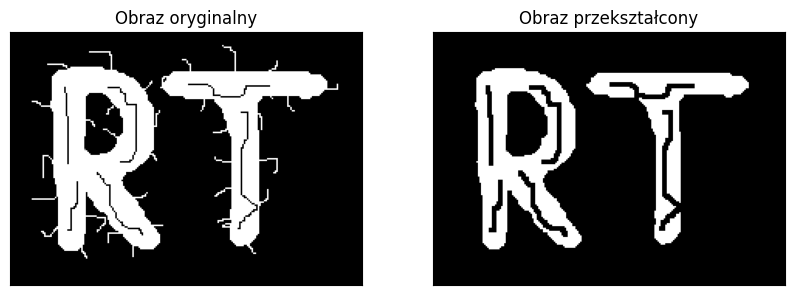

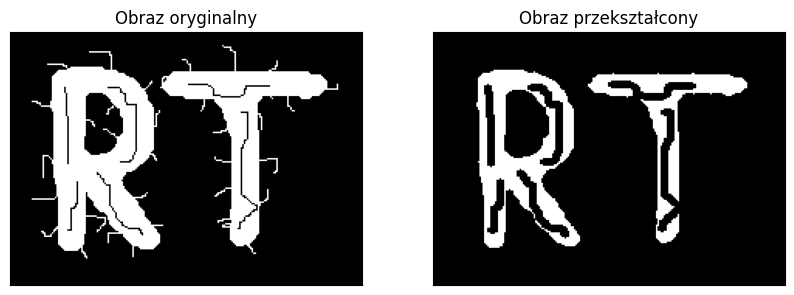

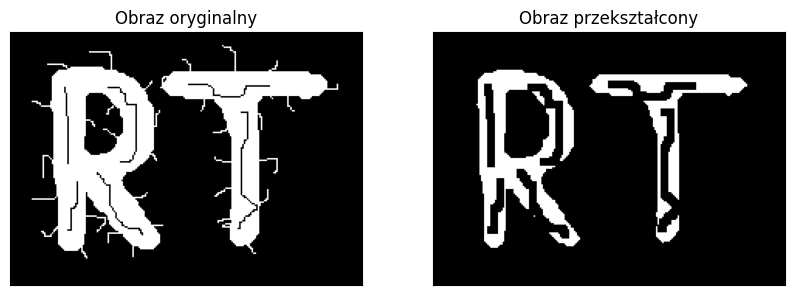

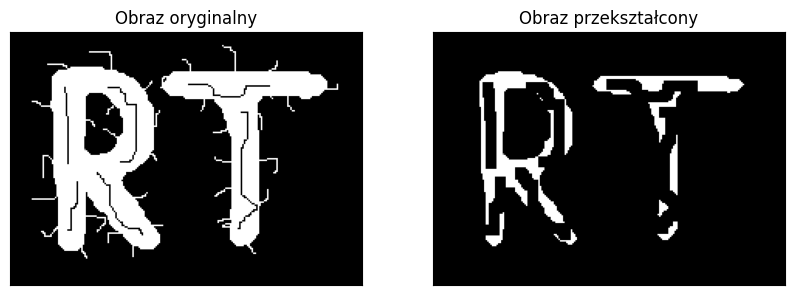

In [3]:
ertka_rect1 = cv2.erode(ertka, square_struct)
img_compare(ertka, ertka_rect1)

ertka_cross = cv2.erode(ertka, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))
img_compare(ertka, ertka_cross)

ertka_rect2 = cv2.erode(ertka_rect1, square_struct)
img_compare(ertka, ertka_rect2)

ertka_rect3 = cv2.erode(ertka_rect2, square_struct)
img_compare(ertka, ertka_rect3)

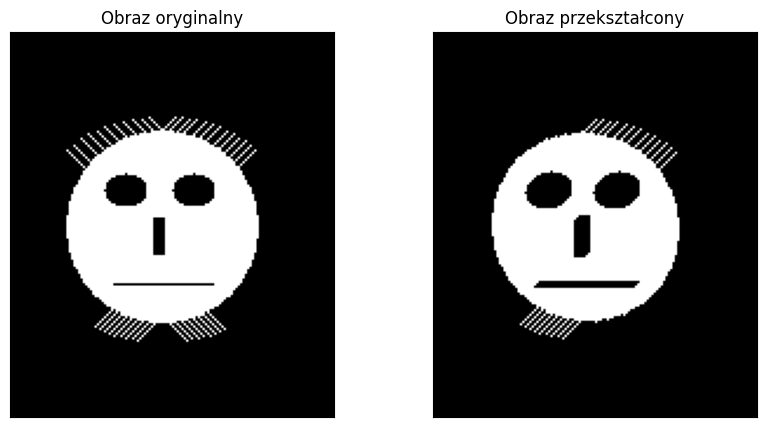

In [4]:
buzka_mat = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]], np.uint8)
buzka_erode = cv2.erode(buzka, buzka_mat)
img_compare(buzka, buzka_erode)

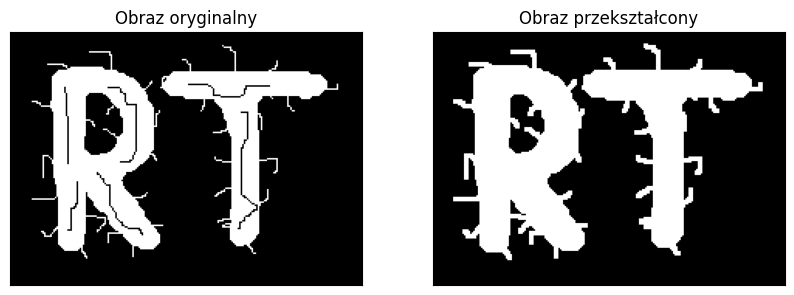

In [5]:
ertka_dilate = cv2.dilate(ertka, square_struct)
img_compare(ertka, ertka_dilate)

In [6]:
def four_ops(image):
    struct = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    erode = cv2.erode(image, struct)
    dilate = cv2.dilate(image, struct)
    open_i = cv2.morphologyEx(image, cv2.MORPH_OPEN, struct)
    close_i = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struct)

    fig, ((e, d), (o, c)) = plt.subplots(2, 2, figsize=(12, 10))
    e.imshow(erode, cmap="gray")
    e.set(xticks=[], yticks=[])
    e.set_title('Obraz po erozji')
    
    d.imshow(dilate, cmap="gray")
    d.set(xticks=[], yticks=[])
    d.set_title('Obraz po dylatacji')

    o.imshow(open_i, cmap="gray")
    o.set(xticks=[], yticks=[])
    o.set_title('Obraz po otwarciu')

    c.imshow(close_i, cmap="gray")
    c.set(xticks=[], yticks=[])
    c.set_title('Obraz po zamknięciu')

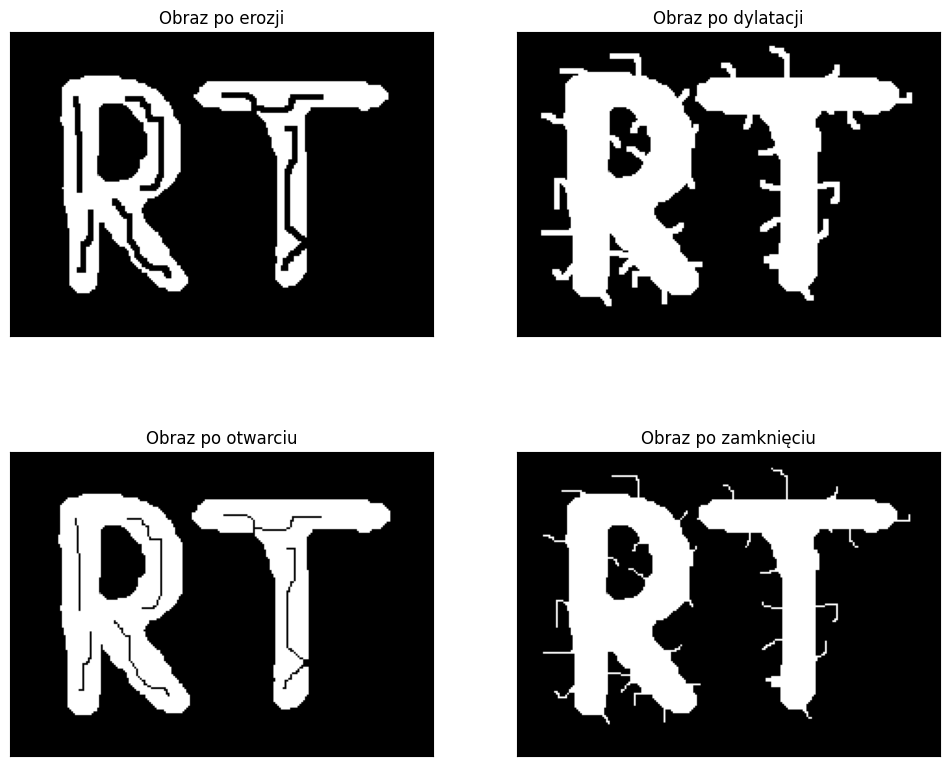

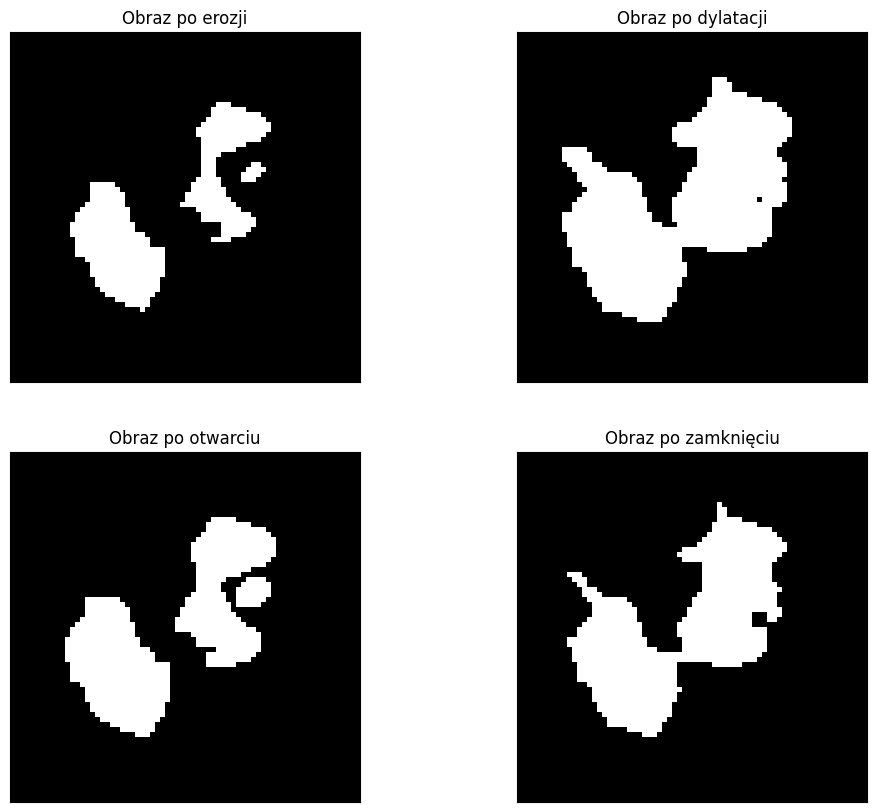

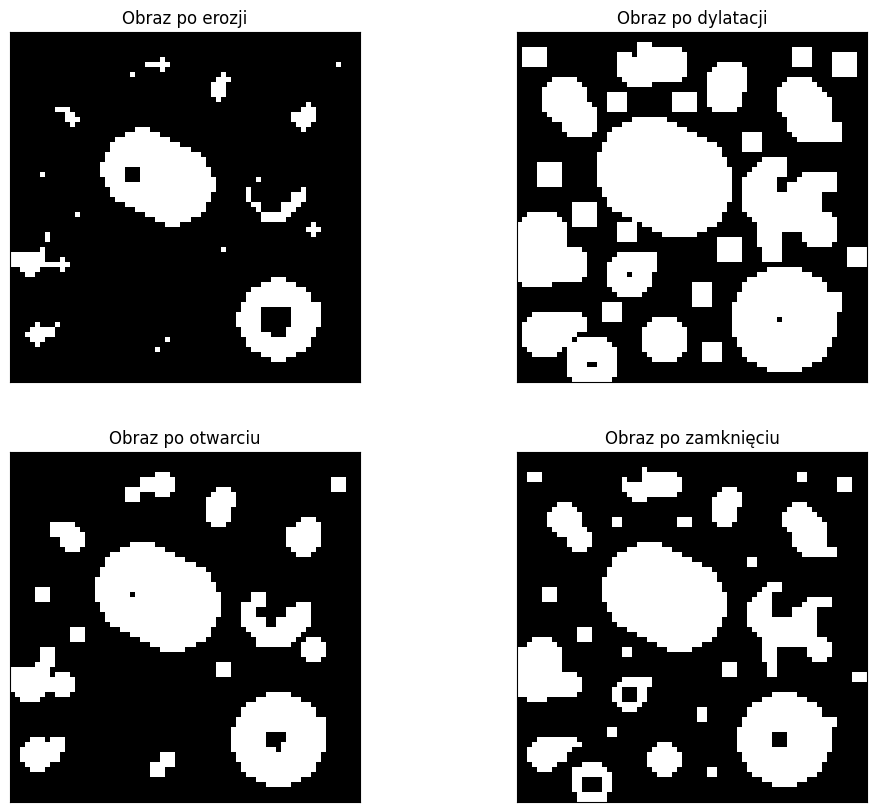

In [7]:
four_ops(ertka)
four_ops(wyspa)
four_ops(kolka)

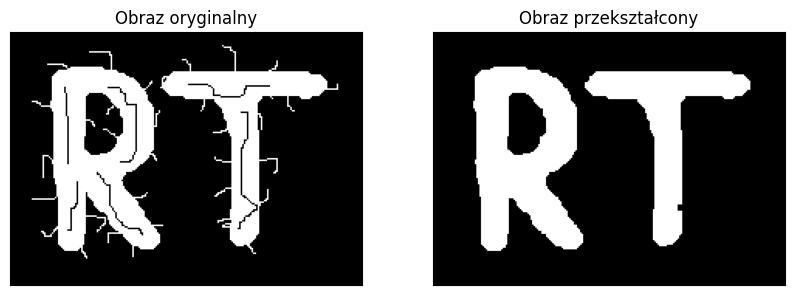

In [8]:
ertka_good = cv2.morphologyEx(ertka, cv2.MORPH_OPEN, square_struct)
ertka_good = cv2.morphologyEx(ertka_good, cv2.MORPH_CLOSE, square_struct)
img_compare(ertka, ertka_good)

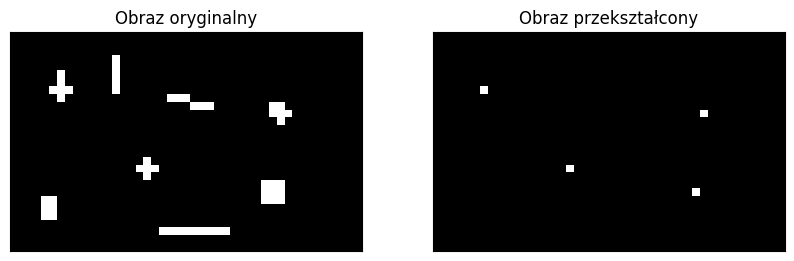

In [9]:
cross_struct = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
hom_hom = cv2.morphologyEx(hom, cv2.MORPH_HITMISS, cross_struct)
img_compare(hom, hom_hom)

## Inne operacje morfologiczne
Do innych operacji morfologicznych należą między innymi ścienianie (ang. _thinning_), szkieletyzacja (ang. _skeletonization_), rekonstrukcja morfologiczna (ang. _morphological reconstruction_), czyszczenie brzegu (ang. _clearing border_) i uzupełnianie dziur (ang. _filling holes_). W tym rozdziale zostanie zaprezentowana rekonstrukcja morfologiczna.

Rekonstrukcja morfologiczna jest operacją trójargumentową. Wymaga podania markera (obrazu, od którego zacznie się transformacja), maski (ograniczenia transformacji) oraz elementu strukturalnego. Operacja polega na wykonywaniu kroków (dopóki w dwóch kolejnych iteracjach nic się nie zmieni):
- dylatacja obrazu markera (z danym elementem strukturalnym),
- nowy marker = część wspólna dylatacji starego markera i maski.

Trzy operacje, które wykorzystują schemat rekonstrukcji to: 
- otwarcie poprzez rekonstrukcję,
- wypełnianie dziur,
- czyszczenie brzegu.

### Otwarcie poprzez rekonstrukcję:
- Wczytaj obraz text.bmp, wyświetl go.
- Załóżmy, że chcemy wykryć na obrazie litery, które zawierają długie pionowe fragmenty. W pierwszym podejściu stosujemy morfologiczne otwarcie z maską pionową o wysokości 51 pikseli (taka jest średnia wysokość liter na obrazie – `np.ones((51,1))`. Sprawdź rezultat takiej operacji.
- Detekcja wprawdzie sie udała, ale otrzymujemy tylko pionowe kreski.
- Rozwiązaniem jest rekonstrukcja – jako marker wybieramy obraz oryginalny poddany erozji. Maskę stanowi obraz oryginalny. Samodzielnie dobierz element strukturalny.
- Zaimplementuj rekonstrukcję i porównaj efekt otwarcia i rekonstrukcji.


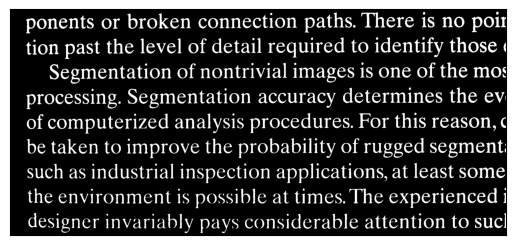

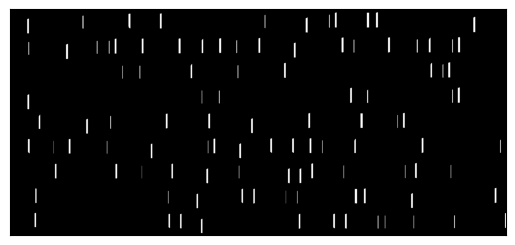

In [10]:
img_show(text)
text_kernel = np.ones((51, 1), dtype=np.uint8)
text_open = cv2.morphologyEx(text, cv2.MORPH_OPEN, text_kernel)
img_show(text_open)

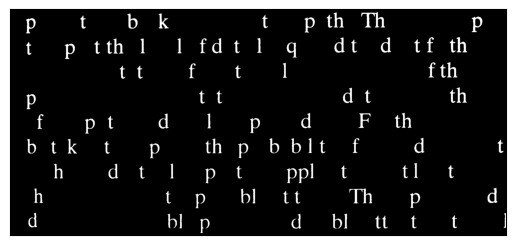

In [11]:
marker = cv2.erode(text, text_kernel)
while True:
    text_rec = cv2.dilate(marker, square_struct)
    text_rec = cv2.bitwise_and(text_rec, text)
    if (marker == text_rec).all():
        marker = text_rec
        break
    marker = text_rec

img_show(marker)

## Operacje morfologiczne dla obrazów w skali szarości

Wszystkie dotychczasowe operacje (oprócz transformacji trafi, nie trafi) mają swoje odpowieniki dla obrazów w skali szarości. Konieczne jest tylko podanie definicji erozji i dylatacji w nieco innej formie:
- Erozja – filtr minimalny.
- Dylatacja – filtr maksymalny.


1. Wczytaj obraz ferrari.bmp i wykonaj operacje morfologiczne: erozję i dylatację. Element strukturalny ustal na kwadrat 3×3. Oblicz też różnicę pomiędzy obrazem po dylatacji a po erozji – czyli tzw. gradient morfologiczny. Rezultaty wyświetl na wspólnym wykresie.
2. Otwarcie to tłumienie jasnych detali na obrazie. Zamkniecie to tłumienie ciemnych detali na obrazie. Potwierdź powyższe stwierdzenia wykonując obie operacje na obrazie _ferrari_.
3. Wykonaj operacje top-hat i bottom-hat `cv2.morphologyEx(img, cv2.MORPH_TOPHAT, strel)` oraz `cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, strel)` na obrazie _ferrari_. Jakie obszary udało sie wykryć za pomocą tej operacji? Z jakich operacji składa sie filtr top-hat?
4. Wczytaj obraz rice.png (z laboratorium o binaryzacji). Wyświetl go. Zwróć uwage na niejednorodne oświetlenie. Wykonaj operacje top-hat z dużym elementem strukturalnym (np. koło o rozmiarze 10) na tym obrazie. Wynik wyświetl. Co stało się z niejednorodnością oświetlenia?

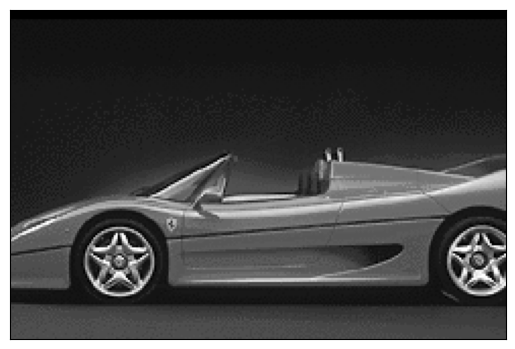

In [12]:
img_show(ferrari)

Text(0.5, 1.0, 'Gradient morfologiczny')

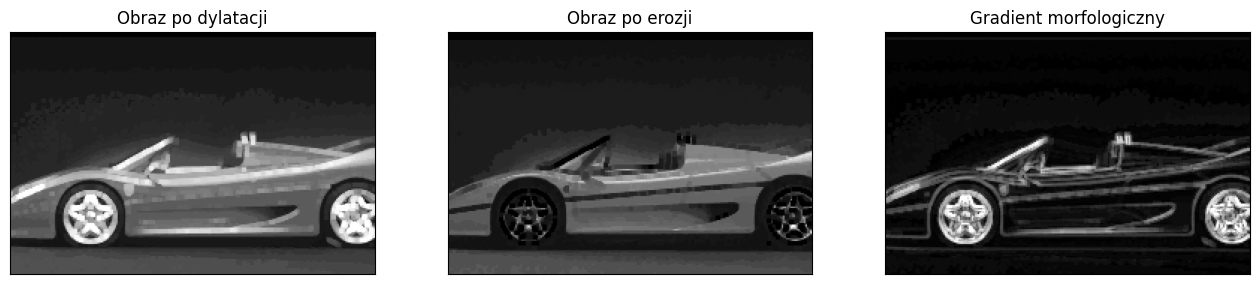

In [13]:
ferrari_dilate = cv2.dilate(ferrari, square_struct)
ferrari_erode = cv2.erode(ferrari, square_struct)
morph_grad = ferrari_dilate - ferrari_erode

fig, (dil, er, grad) = plt.subplots(1, 3, figsize=(16, 4))
dil.imshow(ferrari_dilate, cmap="gray")
dil.set(xticks=[], yticks=[])
dil.set_title('Obraz po dylatacji')

er.imshow(ferrari_erode, cmap="gray")
er.set(xticks=[], yticks=[])
er.set_title('Obraz po erozji')

grad.imshow(morph_grad, cmap="gray")
grad.set(xticks=[], yticks=[])
grad.set_title('Gradient morfologiczny')

Text(0.5, 1.0, 'Obraz po zamknięciu')

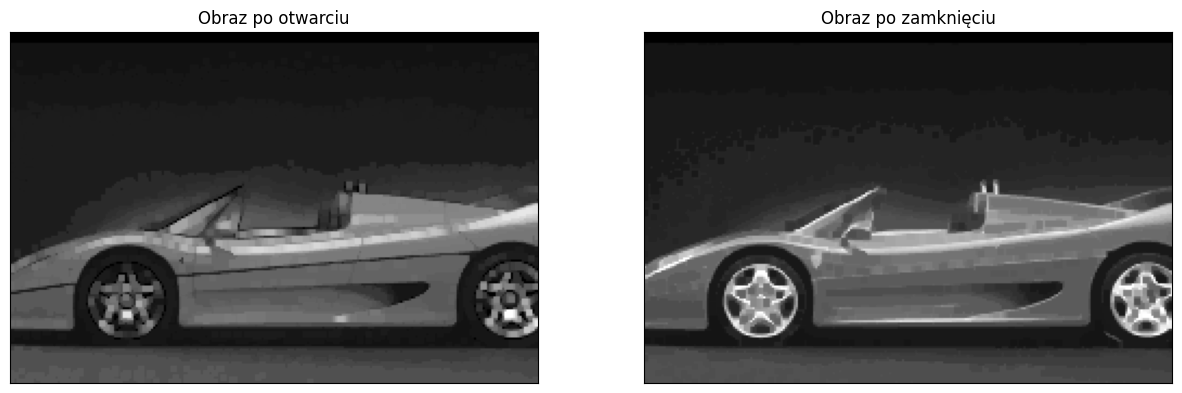

In [14]:
ferrari_open =  cv2.morphologyEx(ferrari, cv2.MORPH_OPEN, square_struct)
ferrari_close = cv2.morphologyEx(ferrari, cv2.MORPH_CLOSE, square_struct)
fig, (op, cl) = plt.subplots(1, 2, figsize=(15, 5))
op.imshow(ferrari_open, cmap="gray")
op.set(xticks=[], yticks=[])
op.set_title('Obraz po otwarciu')

cl.imshow(ferrari_close, cmap="gray")
cl.set(xticks=[], yticks=[])
cl.set_title('Obraz po zamknięciu')

Text(0.5, 1.0, 'Obraz po bottomhat')

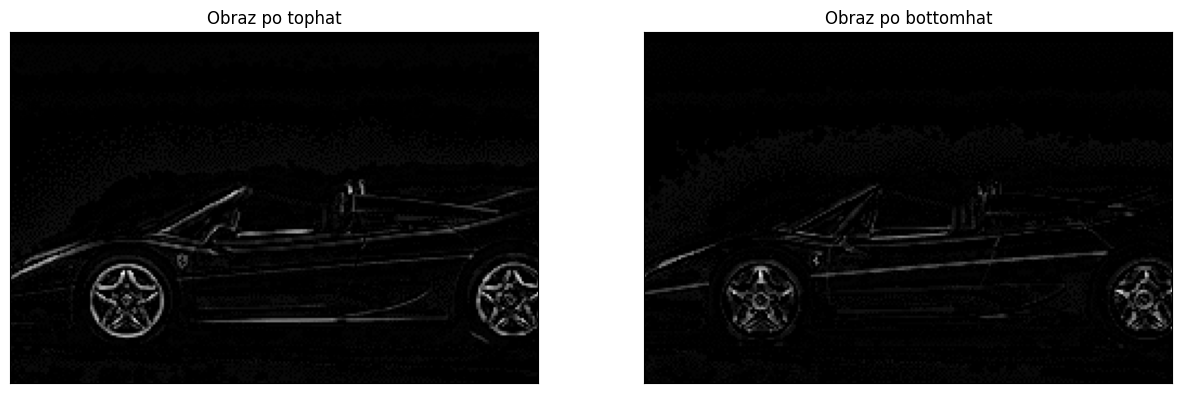

In [15]:
ferrari_top = cv2.morphologyEx(ferrari, cv2.MORPH_TOPHAT, square_struct)
ferrari_bottom = cv2.morphologyEx(ferrari, cv2.MORPH_BLACKHAT, square_struct)

fig, (top, bot) = plt.subplots(1, 2, figsize=(15, 5))
top.imshow(ferrari_top, cmap="gray")
top.set(xticks=[], yticks=[])
top.set_title('Obraz po tophat')

bot.imshow(ferrari_bottom, cmap="gray")
bot.set(xticks=[], yticks=[])
bot.set_title('Obraz po bottomhat')

Text(0.5, 1.0, 'Obraz po tophat')

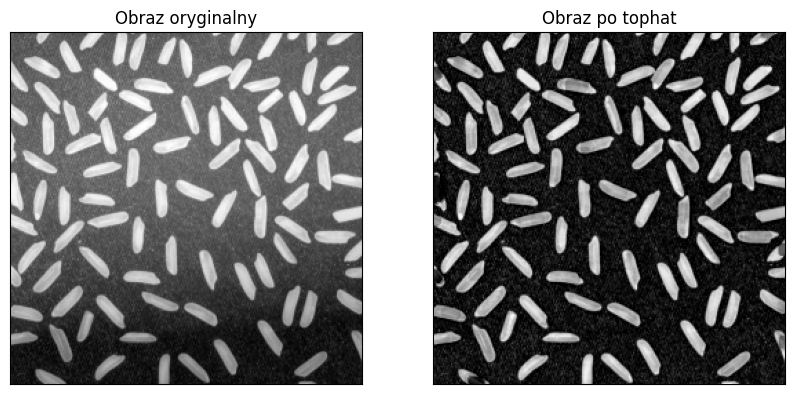

In [16]:
circle_struct = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
rice_tophat = cv2.morphologyEx(rice, cv2.MORPH_TOPHAT, circle_struct)

fig, (org, top) = plt.subplots(1, 2, figsize=(10, 5))
org.imshow(rice, cmap="gray")
org.set(xticks=[], yticks=[])
org.set_title('Obraz oryginalny')

top.imshow(rice_tophat, cmap="gray")
top.set(xticks=[], yticks=[])
top.set_title('Obraz po tophat')

## Przykład zastosowania morfologii

1. Wczytaj obraz calculator.bmp. Wyświetl go. Zadanie do realizacji: wyizolować tekst na klawiszach kalkulatora.
2. W pierwszym kroku usunięte zostaną poziome odbicia znajdujące się na górnej krawędzi każdego z klawiszy. Wykorzystamy fakt, że odbicie jest dłuższe niż jakikolwiek pojedynczy znak. Wykonujemy otwarcie przez rekonstrukcję (można wykorzystać kod z wcześniejszego zadania, ale tym razem mamy do czynienia z obrazem w skali szarości zamiast z binarnym – proszę się zastanowić, jaka operacja jest odpowiednikiem operacji AND?):
  - początkowo wykonujemy erozję z elementem strukturalnym w postaci poziomej linii — `np.ones((1,71))`,
  - następnie dokonujemy rekonstrukcji: marker – obraz po erozji, maska – obraz oryginalny,
  - wynik operacji wyświetl. Dla porównania wyświetl wynik klasycznego otwarcia z takim samym elementem strukturalnym. W czym otwarcie przez rekonstrukcję jest lepsze od klasycznego?
3. W poprzednim kroku (tj. w wyniku otwarcia przez rekonstrukcję) uzyskaliśmy obraz tła. Należy go teraz odjąć od obrazu oryginalnego. Ten rodzaj operacji można nazwać top-hat poprzez rekonstrukcję. Wynik wyświetl. Dla porównania wyświetl wynik klasycznej operacji top-hat – różnicy miedzy obrazem oryginalnym a obrazem po klasycznym otwarciu.
4. W podobny sposób należy zlikwidować odblaski pionowe:
  - erozja z elementem strukturalnym w postaci poziomej linii – `np.ones((1,11))` – zostaną zachowane wszystkie znaki (bo prawie wszystkie są szersze). Uwaga. Operacje wykonujemy na uzyskanym w kroku 3 rezultacie odjęcia od obrazu oryginalnego, obrazu po rekonstrukcji.
  - rekonstrukcja: marker – obraz po erozji, maska – obraz z punktu 3 (różnica oryginalnego i tła),
  - wynik wyświetl.
5. Rezultat jest niemal satysfakcjonujący, ale wystąpił problem z cienkimi pionowymi elementami napisów – np. I na klawiszu ASIN. Wykorzystując fakt, że usunięte znaki znajdują się w bezpośrednim sąsiedztwie istniejących znaków wykonujemy następujące operacje:
  - dylatacja z elementem `np.ones((1,21))`,
  - rekonstrukcja z markerem w postaci – minimum(obraz po dylatacji z punktu powyżej, obraz uzyskany w punkcie 3, tj. różnica oryginalnego i tła) oraz maską – obraz z pkt. 3.
6. Rezultat wyświetl. Czy za pomocą zaproponowanych operacji udało się uzyskać zamierzony efekt – ekstrakcję napisów?


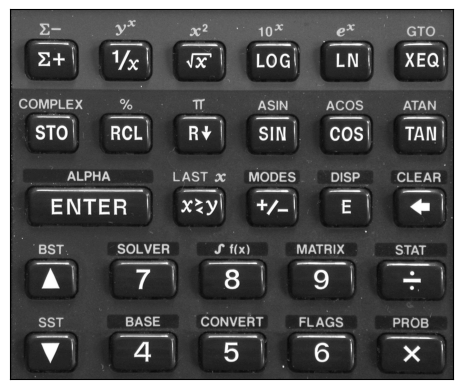

In [17]:
img_show(calculator)

In [18]:
def rec(image, kernel, marker=None):
    mask = image
    if marker is None:
        marker = cv2.erode(image, kernel)
    while True:
        text_delat = cv2.dilate(src=marker, kernel=np.ones((3, 3)))
        text_delat = np.min((text_delat, mask), axis=0)
        if (marker == text_delat).all():
            return marker
        marker = text_delat

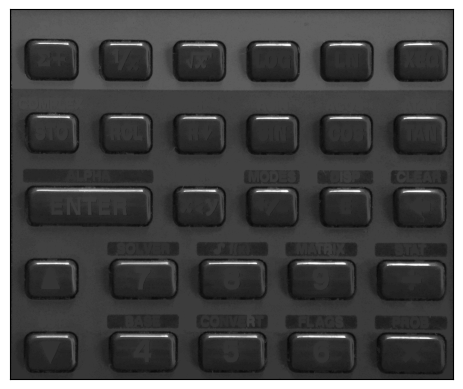

In [19]:
calculator_rec = rec(calculator, np.ones((1, 71)))
img_show(calculator_rec)

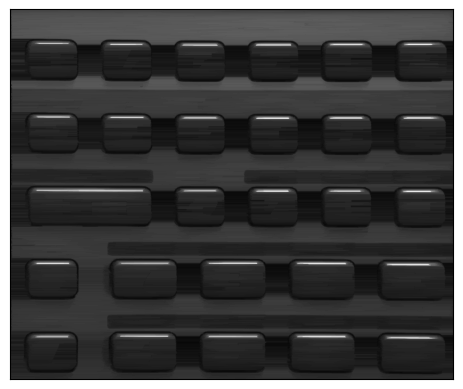

In [20]:
calculator_open = cv2.morphologyEx(calculator, cv2.MORPH_OPEN, np.ones((1, 71)))
img_show(calculator_open)

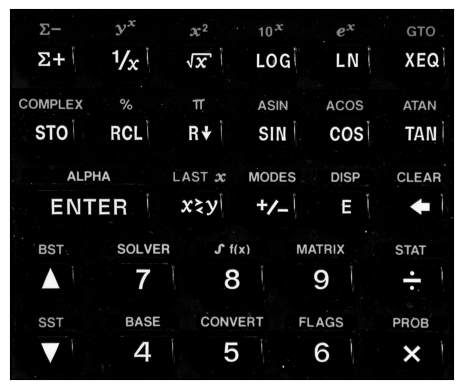

In [21]:
calculator_top_rec = calculator - calculator_rec
img_show(calculator_top_rec)

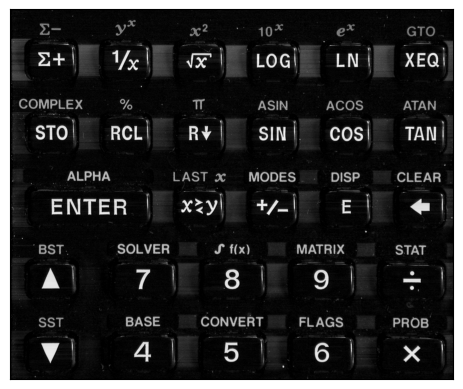

In [22]:
calculator_top_hat = cv2.morphologyEx(calculator, cv2.MORPH_TOPHAT, np.ones((1, 71)))
img_show(calculator_top_hat)

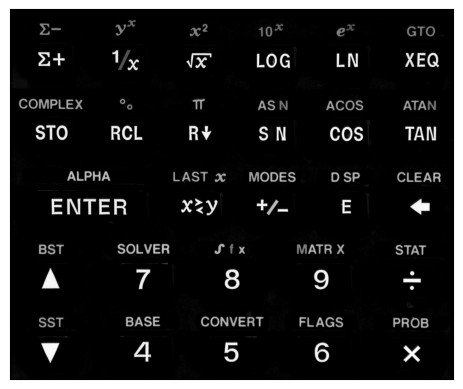

In [23]:
calculator_rec_pion = rec(calculator_top_rec, np.ones((1, 11)))
img_show(calculator_rec_pion)